In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns

In [103]:
df = pd.read_csv('cleandata.csv', delimiter=';', on_bad_lines='skip')

C:\Users\subas\AppData\Local\Temp\ipykernel_31412\2814851341.py:1: DtypeWarning: Columns (33,34,35,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleandata.csv', delimiter=';', on_bad_lines='skip')


In [104]:
pd.options.display.max_columns = 76
pd.options.display.max_rows = 76



In [105]:
df.head()

,neighbourhood_cleansed,room_type,accommodates,property_type,listing_url,last_scraped,source,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Month
0,Weston,Entire home/apt,8,Entire home,https://www.airbnb.com/rooms/16437963,2024-04-13,city scrape,Great 4 Bedroom w/Parking Toronto (Weston Vill...,This home is located in Weston Village a quain...,https://a0.muscache.com/pictures/2ffcfad2-76be...,107788572,https://www.airbnb.com/users/show/107788572,Thomas,2016-12-19,5,95.024397,100.000000,f,https://a0.muscache.com/im/pictures/user/d2475...,https://a0.muscache.com/im/pictures/user/d2475...,2.0,2.0,"['email', 'phone']",t,t,43.70410,-79.51631,1.5,4.0,5.000000,"[\Dishes and silverware\"", \""Long term stays a...",216.000000,28.0,1125,28,28,1125,1125,28,1125,t,30,49.0,49.0,49.0,2024-04-13,192.0,15.0,0.0,4.75,4.82,4.84,4.92,4.88,4.69,4.74,STR-2101-HCHKVJ,f,2.0,2.0,0.0,0.0,2.0,April
1,Weston,Entire home/apt,8,Entire home,https://www.airbnb.com/rooms/36756889,2024-04-13,previous scrape,2+1 bedroom / 8 guests+free Wifi/rent 7 seater...,Our home is located in the historical Weston V...,https://a0.muscache.com/pictures/cc62d7ad-39ed...,276282019,https://www.airbnb.com/users/show/276282019,Colin,2019-07-15,5,95.024397,85.064459,f,https://a0.muscache.com/im/pictures/user/5a48e...,https://a0.muscache.com/im/pictures/user/5a48e...,1.0,1.0,"['email', 'phone']",t,t,43.70794,-79.50785,1.0,2.0,3.950467,"[\Dishes and silverware\"", \""Dryer\"", \""Extra ...",320.727273,28.0,30,28,28,30,30,28,30,f,0,0.0,0.0,0.0,2024-04-13,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,t,1.0,1.0,0.0,0.0,0.0,April
2,Weston,Entire home/apt,5,Entire rental unit,https://www.airbnb.com/rooms/37047977,2024-04-13,previous scrape,Best Weston,Weston is beginning to look a lot different to...,https://a0.muscache.com/pictures/5fc5036a-b9e1...,6033169,https://www.airbnb.com/users/show/6033169,Rusty,2013-04-21,5,95.024397,85.064459,f,https://a0.muscache.com/im/pictures/user/53bc7...,https://a0.muscache.com/im/pictures/user/53bc7...,1.0,1.0,"['email', 'phone']",t,t,43.69738,-79.50788,1.0,3.0,2.622078,"[\Dishes and silverware\"", \""Long term stays a...",111.400000,28.0,1125,28,28,1125,1125,28,1125,f,0,0.0,0.0,0.0,2024-04-13,41.0,0.0,0.0,4.78,4.85,4.76,4.93,5.00,4.24,4.80,0,f,1.0,1.0,0.0,0.0,0.0,April
3,Centennial Scarborough,Entire home/apt,5,Entire rental unit,https://www.airbnb.com/rooms/940829105429920079,2024-04-12,city scrape,Luxury basement apartment,UNKNOWN,https://a0.muscache.com/pictures/miso/Hosting-...,90073492,https://www.airbnb.com/users/show/90073492,Yalda,2016-08-15,within a day,100.000000,100.000000,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,2.0,2.0,"['email', 'phone']",t,t,43.78156,-79.15682,1.0,2.0,2.000000,"[\Dishes and silverware\"", \""Body soap\"", \""Ca...",111.000000,28.0,365,28,28,365,365,28,365,t,0,0.0,18.0,60.0,2024-04-12,1.0,1.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0,t,2.0,2.0,0.0,0.0,0.0,Ap

In [106]:
df.columns

Index(['neighbourhood_cleansed', 'room_type', 'accommodates', 'property_type',
       'listing_url', 'last_scraped', 'source', 'name',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'latitude', 'longitude', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_o

In [110]:
month_mapping = {
    'Dec_2023': 'December',
    'Nov_2023': 'November',
    'Oct_2023': 'October'
}

# Apply the mapping for specific months
df['Month'] = df['Month'].replace(month_mapping)

In [111]:
df['Month'].value_counts()

Month
September    21796
August       21627
July         21438
June         21095
May          20825
March        20752
April        20633
February     20616
January      20375
December     19984
November     19919
October      19262
Name: count, dtype: int64

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248341 entries, 0 to 248340
Data columns (total 64 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   neighbourhood_cleansed                        248341 non-null  object 
 1   room_type                                     248341 non-null  object 
 2   accommodates                                  248341 non-null  int64  
 3   property_type                                 248341 non-null  object 
 4   listing_url                                   248341 non-null  object 
 5   last_scraped                                  248341 non-null  object 
 6   source                                        248341 non-null  object 
 7   name                                          248341 non-null  object 
 8   neighborhood_overview                         248341 non-null  object 
 9   picture_url                                   24

In [113]:
df.isna().sum()

neighbourhood_cleansed                            0
room_type                                         0
accommodates                                      0
property_type                                     0
listing_url                                       0
last_scraped                                      0
source                                            0
name                                              0
neighborhood_overview                             0
picture_url                                       0
host_id                                           0
host_url                                          0
host_name                                        28
host_since                                       28
host_response_time                                0
host_response_rate                                0
host_acceptance_rate                              0
host_is_superhost                                 0
host_thumbnail_url                               28
host_picture

In [114]:
df.dropna(inplace=True)

In [115]:
df['availability_30'] = pd.to_numeric(df['availability_30'], errors='coerce')


In [116]:
df_final = df.drop(columns=['listing_url','last_scraped','source', 'name', 'picture_url', 'host_name', 'host_thumbnail_url','host_picture_url','calendar_last_scraped'], axis=1)

In [117]:
bool_columns = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']
for col in bool_columns:
    df_final[col] = df_final[col].map({'t': 1, 'f': 0})

In [118]:
import ast  

df_final['host_verifications'] = df_final['host_verifications'].apply(ast.literal_eval)

all_verifications = set([item for sublist in df_final['host_verifications'] for item in sublist])

for verification in all_verifications:
    df_final[f'has_{verification}'] = df_final['host_verifications'].apply(lambda x: 1 if verification in x else 0)


df_final.drop(columns=['host_verifications'], inplace=True)

In [119]:
df_final.head()

,neighbourhood_cleansed,room_type,accommodates,property_type,neighborhood_overview,host_id,host_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Month,has_work_email,has_email,has_phone
0,Weston,Entire home/apt,8,Entire home,This home is located in Weston Village a quain...,107788572,https://www.airbnb.com/users/show/107788572,2016-12-19,5,95.024397,100.000000,0,2.0,2.0,1,1,43.70410,-79.51631,1.5,4.0,5.000000,"[\Dishes and silverware\"", \""Long term stays a...",216.000000,28.0,1125,28,28,1125,1125,28,1125,1,30.0,49.0,49.0,49.0,192.0,15.0,0.0,4.75,4.82,4.84,4.92,4.88,4.69,4.74,STR-2101-HCHKVJ,0,2.0,2.0,0.0,0.0,2.0,April,0,1,1
1,Weston,Entire home/apt,8,Entire home,Our home is located in the historical Weston V...,276282019,https://www.airbnb.com/users/show/276282019,2019-07-15,5,95.024397,85.064459,0,1.0,1.0,1,1,43.70794,-79.50785,1.0,2.0,3.950467,"[\Dishes and silverware\"", \""Dryer\"", \""Extra ...",320.727273,28.0,30,28,28,30,30,28,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,1.0,1.0,0.0,0.0,0.0,April,0,1,1
2,Weston,Entire home/apt,5,Entire rental unit,Weston is beginning to look a lot different to...,6033169,https://www.airbnb.com/users/show/6033169,2013-04-21,5,95.024397,85.064459,0,1.0,1.0,1,1,43.69738,-79.50788,1.0,3.0,2.622078,"[\Dishes and silverware\"", \""Long term stays a...",111.400000,28.0,1125,28,28,1125,1125,28,1125,0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,4.78,4.85,4.76,4.93,5.00,4.24,4.80,0,0,1.0,1.0,0.0,0.0,0.0,April,0,1,1
3,Centennial Scarborough,Entire home/apt,5,Entire rental unit,UNKNOWN,90073492,https://www.airbnb.com/users/show/90073492,2016-08-15,within a day,100.000000,100.000000,1,2.0,2.0,1,1,43.78156,-79.15682,1.0,2.0,2.000000,"[\Dishes and silverware\"", \""Body soap\"", \""Ca...",111.000000,28.0,365,28,28,365,365,28,365,1,0.0,0.0,18.0,60.0,1.0,1.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0,1,2.0,2.0,0.0,0.0,0.0,April,0,1,1
4,Weston,Entire home/apt,8,Entire home,This home is located in Weston Village a quain...,107788572,https://www.airbnb.com/users/show/107788572,2016-12-19,within a day,100.000000,100.000000,0,2.0,2.0,1,1,43.70410,-79.51631,1.5,4.0,5.000000,"[\Shampoo\"", \""Long term stays allowed\"", \""Es...",216.000000,28.0,1125,28,28,1125,1125,28,1125,1,2.0,32.0,62.0,70.0,192.0,7.0,0.0,4.75,4.82,4.84,4.92,4.88,4.69,4.74,STR-2101-HCHKVJ,0,2.0,2.0,0.0,0.0,2.0,August,0,1,1


In [120]:
df_final.drop(columns='host_url', inplace=True)

In [121]:
df_final['amenities'].head(20)

0     [\Dishes and silverware\", \"Long term stays a...
1     [\Dishes and silverware\", \"Dryer\", \"Extra ...
2     [\Dishes and silverware\", \"Long term stays a...
3     [\Dishes and silverware\", \"Body soap\", \"Ca...
4     [\Shampoo\", \"Long term stays allowed\", \"Es...
5     [\Shampoo\", \"TV\", \"Essentials\", \"Wifi\",...
6     [\Shampoo\", \"Long term stays allowed\", \"Ke...
7     [\Shampoo\", \"Outdoor playground\", \"TV\", \...
8                                                    []
9                                                    []
10                                                   []
11                                                   []
12    [\Microwave\", \"Free parking on premises\", \...
13    [\Free street parking\", \"Microwave\", \"BBQ ...
14    [\Microwave\", \"Free parking on premises\", \...
15    [\Free parking on premises\", \"Clothing stora...
16    [\First aid kit\", \"Kitchen\", \"Free parking...
17                                              

In [122]:
import re

# Function to clean each amenities entry
def clean_amenities(amenities_string):
    # Remove backslashes and extraneous quotes
    cleaned_string = re.sub(r'\\|"', '', amenities_string)
    # Convert string representation of list to actual Python list
    # Split by comma and strip spaces around each amenity
    amenities_list = [amenity.strip() for amenity in cleaned_string.strip("[]").split(",")]
    return amenities_list

# Apply the cleaning function
df_final['amenities'] = df_final['amenities'].apply(clean_amenities)



In [123]:
df_final['amenities']

0         [Dishes and silverware, Long term stays allowe...
1         [Dishes and silverware, Dryer, Extra pillows a...
2         [Dishes and silverware, Long term stays allowe...
3         [Dishes and silverware, Body soap, Carbon mono...
4         [Shampoo, Long term stays allowed, Essentials,...
                                ...                        
248336    [Wifi, Elevator, Host greets you, Long term st...
248337    [Wifi, Dryer, Essentials, Cleaning products, T...
248338    [TV, Exterior security cameras on property, Wi...
248339    [Wifi, Dryer, Dedicated workspace, TV, First a...
248340    [Wifi, Dryer, Dedicated workspace, TV, First a...
Name: amenities, Length: 247587, dtype: object

In [124]:
Boolean_columns = ['host_is_superhost', 'host_has_profile_pic','host_identity_verified', 'has_availability','instant_bookable' ]
df_final[Boolean_columns]

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
0,0,1,1,1,0
1,0,1,1,0,1
2,0,1,1,0,0
3,1,1,1,1,1
4,0,1,1,1,0
...,...,...,...,...,...
248336,0,1,1,1,0
248337,1,1,1,1,1
248338,1,1,1,1,0
248339,0,1,1,1,0


In [125]:
# Flatten the list of amenities and get their frequency
from collections import Counter
all_amenities = [amenity.strip() for amenities_list in df_final['amenities'] for amenity in amenities_list]
amenity_counts = Counter(all_amenities)

# Get the top 300 amenities
top_amenities = [amenity for amenity, count in amenity_counts.most_common(300)]


In [126]:
top_amenities

['Smoke alarm',
 'Kitchen',
 'Wifi',
 'Carbon monoxide alarm',
 'Essentials',
 'Hangers',
 'Hot water',
 'Hair dryer',
 'Dishes and silverware',
 'Cooking basics',
 'Refrigerator',
 'Iron',
 'Shampoo',
 'Microwave',
 'Air conditioning',
 'Bed linens',
 'Fire extinguisher',
 'Washer',
 'Dedicated workspace',
 'Heating',
 'Long term stays allowed',
 'Self check-in',
 'TV',
 'Hot water kettle',
 'Cleaning products',
 'First aid kit',
 'Dishwasher',
 'Extra pillows and blankets',
 'Dining table',
 'Oven',
 'Freezer',
 'Toaster',
 'Private entrance',
 'Dryer',
 'Free parking on premises',
 'Stove',
 'Bathtub',
 'Shower gel',
 'Wine glasses',
 'Body soap',
 'Coffee maker',
 'Conditioner',
 'Central heating',
 'Room-darkening shades',
 'Coffee',
 'Elevator',
 'Free dryer u2013 In unit',
 'Luggage dropoff allowed',
 'Central air conditioning',
 'Baking sheet',
 'Lock on bedroom door',
 'Lockbox',
 'Outdoor furniture',
 '',
 'Outdoor dining area',
 'Private patio or balcony',
 'Free washer u201

In [127]:
# Filter each row's amenities to only include top amenities
def filter_top_amenities(amenities_list):
    return [amenity for amenity in amenities_list if amenity.strip() in top_amenities]

df_final['filtered_amenities'] = df_final['amenities'].apply(filter_top_amenities)


In [128]:
Boolean_columns = ['host_is_superhost', 'host_has_profile_pic','host_identity_verified', 'has_availability','instant_bookable' ]
df_final[Boolean_columns]

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
0,0,1,1,1,0
1,0,1,1,0,1
2,0,1,1,0,0
3,1,1,1,1,1
4,0,1,1,1,0
...,...,...,...,...,...
248336,0,1,1,1,0
248337,1,1,1,1,1
248338,1,1,1,1,0
248339,0,1,1,1,0


In [129]:
# Create a new mapping dictionary for the top amenities
amenity_to_index = {amenity: idx for idx, amenity in enumerate(top_amenities)}

# Update multi-hot encoding function to use top amenities
def amenities_to_multihot(amenities_list):
    multihot_vector = [0] * len(top_amenities)  # Initialize vector of length 300
    for amenity in amenities_list:
        if amenity.strip() in amenity_to_index:
            multihot_vector[amenity_to_index[amenity.strip()]] = 1
    return multihot_vector

df_final['amenities_multihot'] = df_final['filtered_amenities'].apply(amenities_to_multihot)


In [130]:
print(len(df_final['amenities_multihot'].iloc[0]))

300


In [131]:
Boolean_columns = ['host_is_superhost', 'host_has_profile_pic','host_identity_verified', 'has_availability','instant_bookable' ]
df_final[Boolean_columns]

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
0,0,1,1,1,0
1,0,1,1,0,1
2,0,1,1,0,0
3,1,1,1,1,1
4,0,1,1,1,0
...,...,...,...,...,...
248336,0,1,1,1,0
248337,1,1,1,1,1
248338,1,1,1,1,0
248339,0,1,1,1,0


In [132]:
df_final.head()

,neighbourhood_cleansed,room_type,accommodates,property_type,neighborhood_overview,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Month,has_work_email,has_email,has_phone,filtered_amenities,amenities_multihot
0,Weston,Entire home/apt,8,Entire home,This home is located in Weston Village a quain...,107788572,2016-12-19,5,95.024397,100.000000,0,2.0,2.0,1,1,43.70410,-79.51631,1.5,4.0,5.000000,"[Dishes and silverware, Long term stays allowe...",216.000000,28.0,1125,28,28,1125,1125,28,1125,1,30.0,49.0,49.0,49.0,192.0,15.0,0.0,4.75,4.82,4.84,4.92,4.88,4.69,4.74,STR-2101-HCHKVJ,0,2.0,2.0,0.0,0.0,2.0,April,0,1,1,"[Dishes and silverware, Long term stays allowe...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Weston,Entire home/apt,8,Entire home,Our home is located in the historical Weston V...,276282019,2019-07-15,5,95.024397,85.064459,0,1.0,1.0,1,1,43.70794,-79.50785,1.0,2.0,3.950467,"[Dishes and silverware, Dryer, Extra pillows a...",320.727273,28.0,30,28,28,30,30,28,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,1.0,1.0,0.0,0.0,0.0,April,0,1,1,"[Dishes and silverware, Dryer, Extra pillows a...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,Weston,Entire home/apt,5,Entire rental unit,Weston is beginning to look a lot different to...,6033169,2013-04-21,5,95.024397,85.064459,0,1.0,1.0,1,1,43.69738,-79.50788,1.0,3.0,2.622078,"[Dishes and silverware, Long term stays allowe...",111.400000,28.0,1125,28,28,1125,1125,28,1125,0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,4.78,4.85,4.76,4.93,5.00,4.24,4.80,0,0,1.0,1.0,0.0,0.0,0.0,April,0,1,1,"[Dishes and silverware, Long term stays allowe...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,Centennial Scarborough,Entire home/apt,5,Entire rental unit,UNKNOWN,90073492,2016-08-15,within a day,100.000000,100.000000,1,2.0,2.0,1,1,43.78156,-79.15682,1.0,2.0,2.000000,"[Dishes and silverware, Body soap, Carbon mono...",111.000000,28.0,365,28,28,365,365,28,365,1,0.0,0.0,18.0,60.0,1.0,1.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0,1,2.0,2.0,0.0,0.0,0.0,April,0,1,1,"[Dishes and silverware, Body soap, Carbon mono...","[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, ..."
4,Weston,Entire home/apt,8,Entire home,This home is located in Weston Village a quain...,107788572,2016-12-19,within a day,100.000000,100.000000,0,2.0,2.0,1,1,43.70410,-79.51631,1.5,4.0,5.000000,"[Shampoo, Long term stays allowed, Essentials,...",216.000000,28.0,1125,28,28,1125,1125,28,1125,1,2.0,32.0,62.0,70.0,192.0,7.0,0.0,4.75,4.82,4.84,4.92,4.88,4.69,4.74,STR-2101-HCHKVJ,0,2.0,2.0,0.0,0.0,2.0,August,0,1,1,"[Shampoo, Long term stays allowed, Essentials,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [133]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Input, Embedding, Dense, Concatenate, Flatten, Dropout
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans

# Initialize label encoders
label_encoders = {}
categorical_columns = ['neighbourhood_cleansed', 'room_type', 'property_type', 'Month']

for col in categorical_columns:
    le = LabelEncoder()
    df_final[col] = le.fit_transform(df_final[col])
    label_encoders[col] = le

In [134]:
Boolean_columns = ['host_is_superhost', 'host_has_profile_pic','host_identity_verified', 'has_availability','instant_bookable' ]
df_final[Boolean_columns]

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
0,0,1,1,1,0
1,0,1,1,0,1
2,0,1,1,0,0
3,1,1,1,1,1
4,0,1,1,1,0
...,...,...,...,...,...
248336,0,1,1,1,0
248337,1,1,1,1,1
248338,1,1,1,1,0
248339,0,1,1,1,0


In [135]:
df_final['ROI'] = df_final['price'] * (30 - df_final['availability_30'])

numerical_cols = ['accommodates', 'host_response_rate', 'host_acceptance_rate', 'latitude', 'longitude', 'price', 'beds','bedrooms','bathrooms_text','host_identity_verified',
                  'minimum_nights','maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365',
                  'number_of_reviews', 'review_scores_rating', 'reviews_per_month', 'host_is_superhost', 'host_has_profile_pic', 'has_availability','instant_bookable',
                  'calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                  'calculated_host_listings_count_shared_rooms', 'ROI']

scaler = StandardScaler()
df_final[numerical_cols] = scaler.fit_transform(df_final[numerical_cols])

In [136]:
# TF-IDF on text field
tfidf = TfidfVectorizer(max_features=50)  # Adjust max_features as needed
tfidf_matrix = tfidf.fit_transform(df_final['neighborhood_overview']).toarray()

# Append TF-IDF columns to dataframe
tfidf_df = pd.DataFrame(tfidf_matrix, columns=[f'tfidf_{i}' for i in range(tfidf_matrix.shape[1])])
df_final = pd.concat([df_final.reset_index(drop=True), tfidf_df], axis=1)

In [137]:
df_final.to_csv('CleanData_Afterencoding.csv')

In [138]:
df_final.head(1)

,neighbourhood_cleansed,room_type,accommodates,property_type,neighborhood_overview,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,...,tfidf_12,tfidf_13,tfidf_14,tfidf_15,tfidf_16,tfidf_17,tfidf_18,tfidf_19,tfidf_20,tfidf_21,tfidf_22,tfidf_23,tfidf_24,tfidf_25,tfidf_26,tfidf_27,tfidf_28,tfidf_29,tfidf_30,tfidf_31,tfidf_32,tfidf_33,tfidf_34,tfidf_35,tfidf_36,tfidf_37,tfidf_38,tfidf_39,tfidf_40,tfidf_41,tfidf_42,tfidf_43,tfidf_44,tfidf_45,tfidf_46,tfidf_47,tfidf_48,tfidf_49
0,126,0,2.443647,12,This home is located in Weston Village a quain...,107788572,2016-12-19,5,-0.00049,0.72337,-0.687244,2.0,2.0,0.190291,0.332295,0.381405,-1.656322,0.348913,2.807123,3.061785,"[Dishes and silverware, Long term stays allowe...",0.099095,0.073501,1.439617,28,28,1125,1125,28,1125,0.543893,1.513108,0.926318,0.166495,-0.763796,3.097581,15.0,0.0,...,0.0,0.094805,0.0,0.0,0.08671,0.07921,0.186698,0.178621,0.0,0.09601,0.263348,0.0,0.0,0.080156,0.22385,0.197028,0.097586,0.0,0.0,0.192579,0.0,0.0,0.0,0.0,0.152229,0.0,0.365479,0.322253,0.13766,0.0,0.0,0.0,0.0,0.089297,0.0,0.0,0.0,0.236613


In [139]:
n_clusters = 20  # Adjust based on analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_final['cluster'] = kmeans.fit_predict(df_final[numerical_cols + [f'tfidf_{i}' for i in range(tfidf_matrix.shape[1])] + categorical_columns])

In [140]:
df_final.head()

,neighbourhood_cleansed,room_type,accommodates,property_type,neighborhood_overview,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,...,tfidf_13,tfidf_14,tfidf_15,tfidf_16,tfidf_17,tfidf_18,tfidf_19,tfidf_20,tfidf_21,tfidf_22,tfidf_23,tfidf_24,tfidf_25,tfidf_26,tfidf_27,tfidf_28,tfidf_29,tfidf_30,tfidf_31,tfidf_32,tfidf_33,tfidf_34,tfidf_35,tfidf_36,tfidf_37,tfidf_38,tfidf_39,tfidf_40,tfidf_41,tfidf_42,tfidf_43,tfidf_44,tfidf_45,tfidf_46,tfidf_47,tfidf_48,tfidf_49,cluster
0,126,0,2.443647,12,This home is located in Weston Village a quain...,107788572,2016-12-19,5,-0.000490,0.723370,-0.687244,2.0,2.0,0.190291,0.332295,0.381405,-1.656322,0.348913,2.807123,3.061785,"[Dishes and silverware, Long term stays allowe...",0.099095,0.073501,1.439617,28,28,1125,1125,28,1125,0.543893,1.513108,0.926318,0.166495,-0.763796,3.097581,15.0,0.0,...,0.094805,0.000000,0.0,0.086710,0.07921,0.186698,0.178621,0.0,0.09601,0.263348,0.0,0.0,0.080156,0.22385,0.197028,0.097586,0.0,0.0,0.192579,0.0,0.0,0.0,0.0,0.152229,0.000000,0.365479,0.322253,0.13766,0.0,0.0,0.0,0.0,0.089297,0.0,0.0,0.0,0.236613,8
1,126,0,2.443647,12,Our home is located in the historical Weston V...,276282019,2019-07-15,5,-0.000490,0.000175,-0.687244,1.0,1.0,0.190291,0.332295,0.457794,-1.538391,-0.467469,0.596758,2.097573,"[Dishes and silverware, Dryer, Extra pillows a...",0.449566,0.073501,-1.067812,28,28,30,30,28,30,-1.838598,-0.949813,-1.098039,-1.188605,-1.143530,-0.471431,0.0,0.0,...,0.000000,0.000000,0.0,0.312111,0.00000,0.448012,0.428630,0.0,0.00000,0.315973,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.365297,0.000000,0.000000,0.193324,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,8
2,126,0,0.937670,16,Weston is beginning to look a lot different to...,6033169,2013-04-21,5,-0.000490,0.000175,-0.687244,1.0,1.0,0.190291,0.332295,0.247725,-1.538809,-0.467469,1.701941,0.877175,"[Dishes and silverware, Long term stays allowe...",-0.250949,0.073501,1.439617,28,28,1125,1125,28,1125,-1.838598,-0.949813,-1.098039,-1.188605,-1.143530,0.290702,0.0,0.0,...,0.000000,0.224813,0.0,0.000000,0.00000,0.461664,0.294461,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.501904,0.252775,0.225937,0.265620,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,2
3,22,0,0.937670,16,UNKNOWN,90073492,2016-08-15,within a day,0.356252,0.723370,1.455088,2.0,2.0,0.190291,0.332295,1.922308,3.354899,-0.467469,0.596758,0.305669,"[Dishes and silverware, Body soap, Carbon mono...",-0.252288,0.073501,-0.300699,28,28,365,365,28,365,0.543893,-0.949813,-1.098039,-0.690813,-0.678549,-0.452843,1.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1
4,126,0,2.443647,12,This home is located in Weston Village a quain...,107788572,2016-12-19,within a day,0.356252,0.723370,-0.687244,2.0,2.0,0.190291,0.332295,0.381405,-1.656322,0.348913,2.807123,3.061785,"[Shampoo, Long term stays allowed, Essentials,...",0.099095,0.073501,1.439617,28,28,1125,1125,28,1125,0.543893,-0.785619,0.223990,0.526012,-0.601053,3.097581,7.0,0.0,...,0.094805,0.000000,0.0,0.086710,0.07921,0.186698,0.178621,0.0,0.09601,0.263348,0.0,0.0,0.080156,0.22385,0.197028,0.097586,0.0,0.0,0.192579,0.0,0.0,0.0,0.0,0.152229,0.000000,0.365479,0.322253,0.13766,0.0,0.0,0.0,0.0,0.0892

In [141]:
from tensorflow.keras.layers import Input, Embedding, Dense, Concatenate, Flatten, Dropout
from tensorflow.keras.models import Model

# Define inputs for categorical features
input_neighborhood = Input(shape=(1,), name='neighborhood')
input_room_type = Input(shape=(1,), name='room_type')
input_property_type = Input(shape=(1,), name='property_type')
input_Month = Input(shape=(1,), name='Month')
input_cluster = Input(shape=(1,), name='cluster')

# Embedding layers for categorical features
embedding_neighborhood = Embedding(input_dim=len(label_encoders['neighbourhood_cleansed'].classes_), output_dim=10)(input_neighborhood)
embedding_room_type = Embedding(input_dim=len(label_encoders['room_type'].classes_), output_dim=5)(input_room_type)
embedding_property_type = Embedding(input_dim=len(label_encoders['property_type'].classes_), output_dim=5)(input_property_type)
embedding_Month = Embedding(input_dim=len(label_encoders['Month'].classes_), output_dim=5)(input_Month)
embedding_cluster = Embedding(input_dim=n_clusters, output_dim=4)(input_cluster)

# Flatten embeddings
embedding_neighborhood = Flatten()(embedding_neighborhood)
embedding_room_type = Flatten()(embedding_room_type)
embedding_property_type = Flatten()(embedding_property_type)
embedding_Month = Flatten()(embedding_Month)
embedding_cluster = Flatten()(embedding_cluster)


In [142]:
# Input for numerical features
input_numerical = Input(shape=(len(numerical_cols),), name='numerical_input')

# Input for TF-IDF features
input_tfidf = Input(shape=(tfidf_matrix.shape[1],), name='tfidf_input')

In [143]:
# Input and embedding for amenities (multi-hot encoding)
amenities_selected = 300
input_amenities = Input(shape=(amenities_selected,), name='amenities_input')
embedding_amenities = Dense(32, activation='relu')(input_amenities) 

In [144]:
# Concatenate all features
combined_embeddings = Concatenate()([embedding_neighborhood, embedding_room_type, embedding_property_type, embedding_Month, embedding_cluster])
combined_features = Concatenate()([combined_embeddings, input_numerical, input_tfidf, embedding_amenities])

# Dense layers for ROI prediction
dense_layer_1 = Dense(128, activation='relu')(combined_features)
dropout_1 = Dropout(0.2)(dense_layer_1)
dense_layer_2 = Dense(64, activation='relu')(dropout_1)
dropout_2 = Dropout(0.2)(dense_layer_2)
output = Dense(1, activation='linear', name='ROI')(dropout_2)

# Define the model
model = Model(inputs=[input_neighborhood, input_room_type, input_property_type, input_Month, input_cluster,
                      input_numerical, input_tfidf, input_amenities], outputs=output)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ neighborhood        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ room_type           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ property_type       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Month (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cluster             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_5         │ (None, 1, 10)     │      1,400 │ neighborhood[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_6         │ (None, 1, 5)      │         20 │ room_type[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_7         │ (None, 1, 5)      │        355 │ property_type[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_8         │ (None, 1, 5)      │         60 │ Month[0][0]       │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_9         │ (None, 1, 4)      │         80 │ cluster[0][0]     │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 10)        │          0 │ embedding_5[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_6 (Flatten) │ (None, 5)         │          0 │ embedding_6[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 5)         │          0 │ embedding_7[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 5)         │          0 │ embedding_8[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_9 (Flatten) │ (None, 4)         │          0 │ embedding_9[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ amenities_input     │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 29)        │          0 │ flatten_5[0][0],  │
│ (Concatenate)       │                   │            │ flatten_6[0][0],  │
│                     │                   │            │ flatten_7[0][0],  │
│                     │                   │            │ flatten_8[0][0],  │
│                     │                   │            │ flatten_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numerical_input     │ (None, 28)        │          0 │ -               

 Total params: 37,788 (147.61 KB)

 Trainable params: 37,788 (147.61 KB)

 Non-trainable params: 0 (0.00 B)

In [189]:
X = {
    'neighborhood': df_final['neighbourhood_cleansed'].values,
    'room_type': df_final['room_type'].values,
    'property_type': df_final['property_type'].values,
    'Month': df_final['Month'].values,
    'cluster': df_final['cluster'].values,
    'numerical_input': df_final[numerical_cols].values,
    'tfidf_input': tfidf_matrix,
    'amenities_input': np.stack(df_final['amenities_multihot'].values)
}


In [146]:

y = df_final['ROI']

# Train the model
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
6190/6190 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.0785 - val_loss: 0.0041
Epoch 2/50
6190/6190 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0514 - val_loss: 0.0127
Epoch 3/50
6190/6190 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0493 - val_loss: 0.0175
Epoch 4/50
6190/6190 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0477 - val_loss: 0.0249
Epoch 5/50
6190/6190 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0518 - val_loss: 0.0140
Epoch 6/50
6190/6190 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0590 - val_loss: 0.0832
Epoch 7/50
6190/6190 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0625 - val_loss: 0.0132
Epoch 8/50
6190/6190 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0555 - val_loss: 0.0208
Epoch 9/50
6190/6190 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0680 - val_loss: 0.0257
Epoch 10/50
6190/6190 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0561 - val_loss: 0.0402
Epoch 11/50
6190/6190 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0418 - val_loss: 0.0286
Epoch 12/50
6190/61

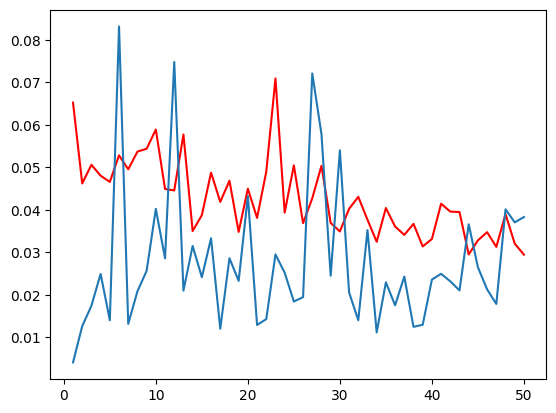

In [147]:
plt.plot(range(1, 51),history.history['loss'], color= 'red')
plt.plot(range(1,51),history.history['val_loss'])

# Increasing model complexity

In [100]:
# using embedding layer in amenities as well
embedding_amenities = Embedding(input_dim=300, output_dim=64)(input_amenities)

# Dense Layer for amenities (as an example)
embedding_amenities = Dense(128, activation='relu')(input_amenities)

# Increase embedding dimensions
embedding_neighborhood = Embedding(input_dim=len(label_encoders['neighbourhood_cleansed'].classes_), output_dim=50)(input_neighborhood)
embedding_room_type = Embedding(input_dim=len(label_encoders['room_type'].classes_), output_dim=20)(input_room_type)
embedding_property_type = Embedding(input_dim=len(label_encoders['property_type'].classes_), output_dim=20)(input_property_type)
embedding_Month = Embedding(input_dim=len(label_encoders['Month'].classes_), output_dim=20)(input_Month)
embedding_cluster = Embedding(input_dim=n_clusters, output_dim=20)(input_cluster)

# Concatenate embeddings
combined_embeddings = Concatenate()([Flatten()(embedding_neighborhood), Flatten()(embedding_room_type),
                                     Flatten()(embedding_property_type), Flatten()(embedding_Month),
                                     Flatten()(embedding_cluster)])

# Concatenate all features
combined_features = Concatenate()([combined_embeddings, input_numerical, input_tfidf, embedding_amenities])

# Dense layers
dense_layer_1 = Dense(512, activation='relu')(combined_features)
dropout_1 = Dropout(0.3)(dense_layer_1)
dense_layer_2 = Dense(256, activation='relu')(dropout_1)
dropout_2 = Dropout(0.3)(dense_layer_2)
dense_layer_3 = Dense(128, activation='relu')(dropout_2)  # Additional layer
dropout_3 = Dropout(0.3)(dense_layer_3)
output = Dense(1, activation='linear', name='ROI_output')(dropout_3)



In [46]:
model = Model(inputs=[input_neighborhood, input_room_type, input_property_type, input_Month, input_cluster,
                      input_numerical, input_tfidf, input_amenities], outputs=output)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ neighborhood        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ room_type           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ property_type       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Month (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cluster             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 10)     │      1,400 │ neighborhood[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 5)      │         20 │ room_type[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 1, 5)      │        355 │ property_type[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 1, 5)      │         60 │ Month[0][0]       │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_4         │ (None, 1, 4)      │         80 │ cluster[0][0]     │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 10)        │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 5)         │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 5)         │          0 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 5)         │          0 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 4)         │          0 │ embedding_4[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ amenities_input     │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 29)        │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ flatten_2[0][0],  │
│                     │                   │            │ flatten_3[0][0],  │
│                     │                   │            │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numerical_input     │ (None, 27)        │          0 │ -               

 Total params: 37,660 (147.11 KB)

 Trainable params: 37,660 (147.11 KB)

 Non-trainable params: 0 (0.00 B)

In [129]:
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
6190/6190 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - loss: 0.1822 - val_loss: 0.1074
Epoch 2/100
6190/6190 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - loss: 0.1489 - val_loss: 0.0899
Epoch 3/100
6190/6190 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - loss: 0.1541 - val_loss: 0.1100
Epoch 4/100
6190/6190 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 0.2173 - val_loss: 0.1474
Epoch 5/100
6190/6190 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 0.1781 - val_loss: 0.2010
Epoch 6/100
6190/6190 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 0.1660 - val_loss: 0.0989
Epoch 7/100
6190/6190 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 0.2044 - val_loss: 0.0795
Epoch 8/100
6190/6190 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 0.1833 - val_loss: 0.0786
Epoch 9/100
6190/6190 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 0.2971 - val_loss: 0.1026
Epoch 10/100
6190/6190 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 0.1630 - val_loss: 0.1368
Epoch 11/100
6190/6190 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 0.1757 - val_loss: 0.1133
Epoch 12

ValueError: x and y must have same first dimension, but have shapes (100,) and (50,)

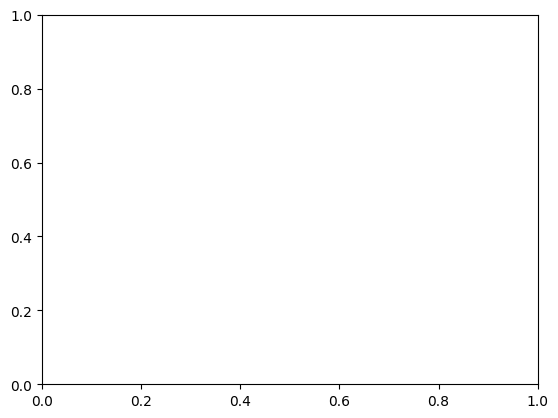

In [58]:
plt.plot(range(1, 101),history.history['loss'])
plt.plot(range(1,101),history.history['val_loss'])

## Making Recommendation

In [171]:
df_final.columns


Index(['neighbourhood_cleansed', 'room_type', 'accommodates', 'property_type',
       'neighborhood_overview', 'host_id', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate',
       ...
       'tfidf_42', 'tfidf_43', 'tfidf_44', 'tfidf_45', 'tfidf_46', 'tfidf_47',
       'tfidf_48', 'tfidf_49', 'cluster', 'target_ROI'],
      dtype='object', length=110)

In [120]:
print(f'Price mean: {scaler.mean_[5]}')
print(f'SD: {scaler.scale_[5]}')

Price mean: 186.38840502685508
SD: 298.81924417057377


In [149]:
for layer in model.layers:
    print(layer.name)

neighborhood
room_type
property_type
Month
cluster
embedding_5
embedding_6
embedding_7
embedding_8
embedding_9
flatten_5
flatten_6
flatten_7
flatten_8
flatten_9
amenities_input
concatenate_2
numerical_input
tfidf_input
dense_3
concatenate_3
dense_4
dropout_2
dense_5
dropout_3
ROI


In [148]:
import numpy as np

# Save neighborhood embeddings
neighborhood_embeddings = model.get_layer('embedding_11').get_weights()[0]
np.save('./Trainlayer/neighborhood_embeddings.npy', neighborhood_embeddings)

# Save room type embeddings
room_type_embeddings = model.get_layer('embedding_12').get_weights()[0]
np.save('./Trainlayer/room_type_embeddings.npy', room_type_embeddings)

# Save property type embeddings
property_type_embeddings = model.get_layer('embedding_13').get_weights()[0]
np.save('./Trainlayer/property_type_embeddings.npy', property_type_embeddings)

# Save month embeddings
month_embeddings = model.get_layer('embedding_14').get_weights()[0]
np.save('./Trainlayer/month_embeddings.npy', month_embeddings)

# Save cluster embeddings
cluster_embeddings = model.get_layer('embedding_15').get_weights()[0]
np.save('./Trainlayer/cluster_embeddings.npy', cluster_embeddings)


In [41]:
df_final.head()

,neighbourhood_cleansed,room_type,accommodates,property_type,neighborhood_overview,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,...,tfidf_14,tfidf_15,tfidf_16,tfidf_17,tfidf_18,tfidf_19,tfidf_20,tfidf_21,tfidf_22,tfidf_23,tfidf_24,tfidf_25,tfidf_26,tfidf_27,tfidf_28,tfidf_29,tfidf_30,tfidf_31,tfidf_32,tfidf_33,tfidf_34,tfidf_35,tfidf_36,tfidf_37,tfidf_38,tfidf_39,tfidf_40,tfidf_41,tfidf_42,tfidf_43,tfidf_44,tfidf_45,tfidf_46,tfidf_47,tfidf_48,tfidf_49,cluster,target_ROI
0,126,0,2.443647,12,This home is located in Weston Village a quain...,107788572,2016-12-19,5,-0.000490,0.723370,-0.687244,2.0,2.0,0.190291,0.332295,0.381405,-1.656322,0.348913,2.807123,3.061785,"[Dishes and silverware, Long term stays allowe...",0.099095,0.073501,1.439617,28,28,1125,1125,28,1125,0.543893,1.513108,0.926318,0.166495,-0.763796,3.097581,15.0,0.0,...,0.000000,0.0,0.086710,0.07921,0.186698,0.178621,0.0,0.09601,0.263348,0.0,0.0,0.080156,0.22385,0.197028,0.097586,0.0,0.0,0.192579,0.0,0.0,0.0,0.0,0.152229,0.000000,0.365479,0.322253,0.13766,0.0,0.0,0.0,0.0,0.089297,0.0,0.0,0.0,0.236613,2,0.149942
1,126,0,2.443647,12,Our home is located in the historical Weston V...,276282019,2019-07-15,5,-0.000490,0.000175,-0.687244,1.0,1.0,0.190291,0.332295,0.457794,-1.538391,-0.467469,0.596758,2.097573,"[Dishes and silverware, Dryer, Extra pillows a...",0.449566,0.073501,-1.067812,28,28,30,30,28,30,-1.838598,-0.949813,-1.098039,-1.188605,-1.143530,-0.471431,0.0,0.0,...,0.000000,0.0,0.312111,0.00000,0.448012,0.428630,0.0,0.00000,0.315973,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.365297,0.000000,0.000000,0.193324,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,2,-0.427003
2,126,0,0.937670,16,Weston is beginning to look a lot different to...,6033169,2013-04-21,5,-0.000490,0.000175,-0.687244,1.0,1.0,0.190291,0.332295,0.247725,-1.538809,-0.467469,1.701941,0.877175,"[Dishes and silverware, Long term stays allowe...",-0.250949,0.073501,1.439617,28,28,1125,1125,28,1125,-1.838598,-0.949813,-1.098039,-1.188605,-1.143530,0.290702,0.0,0.0,...,0.224813,0.0,0.000000,0.00000,0.461664,0.294461,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.501904,0.252775,0.225937,0.265620,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,14,0.238355
3,22,0,0.937670,16,UNKNOWN,90073492,2016-08-15,within a day,0.356252,0.723370,1.455088,2.0,2.0,0.190291,0.332295,1.922308,3.354899,-0.467469,0.596758,0.305669,"[Dishes and silverware, Body soap, Carbon mono...",-0.252288,0.073501,-0.300699,28,28,365,365,28,365,0.543893,-0.949813,-1.098039,-0.690813,-0.678549,-0.452843,1.0,0.0,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1,0.239626
4,126,0,2.443647,12,This home is located in Weston Village a quain...,107788572,2016-12-19,within a day,0.356252,0.723370,-0.687244,2.0,2.0,0.190291,0.332295,0.381405,-1.656322,0.348913,2.807123,3.061785,"[Shampoo, Long term stays allowed, Essentials,...",0.099095,0.073501,1.439617,28,28,1125,1125,28,1125,0.543893,-0.785619,0.223990,0.526012,-0.601053,3.097581,7.0,0.0,...,0.000000,0.0,0.086710,0.07921,0.186698,0.178621,0.0,0.09601,0.263348,0.0,0.0,0.080156,0.22385,0.197028,0.097586,0.0,0.0,0.192579,0.0,0.0,0.0,0.0,0.152229,0.000000,0.365479,0.322253,0.13766,0.0,0.0,0.0,0.0,0.089297,0.

In [88]:
neighborhood_embeddings = model.get_layer('embedding').get_weights()[0]
neighborhood_embeddings.shape

embeddingng = np.load('./Trainlayer/cluster_embeddings.npy')
embeddingng.shape

(20, 5)

In [150]:
import numpy as np
import pandas as pd

# Example: Assuming you have a trained embedding model and a dataframe `df_listings`
# containing listings data with columns: ['host_id', 'neighbourhood_cleansed', 'room_type', ...]

# Step 1: Retrieve all listings for a given `host_id`
host_id = 107788572
user_listings = df_final[df_final['host_id'] == host_id]

# Step 2: Compute embeddings for each feature using the trained embedding layers
def get_embedding(model, feature, values):
    """
    Fetch embeddings for a categorical feature using the trained embedding layer.
    :param model: Trained Keras model
    :param feature: Name of the input feature (e.g., 'neighborhood')
    :param values: Categorical values (e.g., [0, 1, 2] for encoded categories)
    :return: Embedding vectors
    """
    embedding_layer = model.get_layer(f"embedding_{feature}")
    
    
    embeddings = embedding_layer(np.array(values))
    return embeddings.numpy()

# Retrieve embeddings for categorical features
neighborhood_embeddings = get_embedding(model, '5', user_listings['neighbourhood_cleansed'])
room_type_embeddings = get_embedding(model, '6', user_listings['room_type'])
property_type_embeddings = get_embedding(model, '7', user_listings['property_type'])
month_embeddings = get_embedding(model, '8', user_listings['Month'])
cluster_embeddings = get_embedding(model, '9', user_listings['cluster'])

# Step 3: Aggregate embeddings (e.g., mean)
user_profile = {
    'neighborhood': np.mean(neighborhood_embeddings, axis=0),
    'room_type': np.mean(room_type_embeddings, axis=0),
    'property_type': np.mean(property_type_embeddings, axis=0),
    'month': np.mean(month_embeddings, axis=0),
    'cluster': np.mean(cluster_embeddings, axis=0)
}

In [151]:
# Creating the array for numerical column for user_profiling
numerical_cols = ['accommodates', 'host_response_rate', 'host_acceptance_rate', 'latitude', 'longitude', 'price', 'beds','bedrooms','bathrooms_text','host_identity_verified',
                  'minimum_nights','maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365',
                  'number_of_reviews', 'review_scores_rating', 'reviews_per_month', 'host_is_superhost', 'host_has_profile_pic', 'has_availability','instant_bookable',
                  'calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                  'calculated_host_listings_count_shared_rooms', 'ROI']

for column in numerical_cols:
    user_profile[column] = np.array([user_listings[column].mean()])

In [152]:
# Convert the user profile to a single concatenated vector
user_profile_vector = np.concatenate(list(user_profile.values()))

In [153]:
user_profile_vector

array([-0.28342685, -0.10426545, -0.35010025, -0.0649541 , -0.30270258,
        0.2617377 ,  0.10139781, -0.47017357, -0.11894133, -0.19294383,
       -0.06144622, -0.00812917,  1.11875331, -0.90158635,  0.99845821,
       -0.05294749, -0.07453332, -0.01379799,  0.04961017, -0.03206778,
        0.01139226,  0.00229727,  0.04847798, -0.02750508, -0.00311864,
       -0.1398475 ,  0.01404694,  0.05444814, -0.09204406,  0.93767004,
        0.2670666 ,  0.7233696 , -0.12327738, -1.21247811, -0.06963695,
        1.06367191,  1.09989165, -0.05927813,  0.33229494, -0.024526  ,
        0.56945909, -0.111736  , -0.16848758, -0.11236027,  0.25011981,
        1.46720538,  0.61963211,  0.17146572, -0.68724352,  0.19029105,
        0.24608134, -0.49295686, -0.26253452, -0.09065881, -0.3453254 ,
       -0.08312508, -0.00312537])

In [154]:
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Generate vectors for all listings
listing_vectors = []
for _, listing in df_final.iterrows():
    # Retrieve embeddings for the listing
    neighborhood = get_embedding(model, '5', [listing['neighbourhood_cleansed']])
    room_type = get_embedding(model, '6', [listing['room_type']])
    property_type = get_embedding(model, '7', [listing['property_type']])
    month = get_embedding(model, '8', [listing['Month']])
    cluster = get_embedding(model, '9', [listing['cluster']])
    
    # Aggregate into a single vector
    vector = np.concatenate([
        neighborhood.flatten(),
        room_type.flatten(),
        property_type.flatten(),
        month.flatten(),
        cluster.flatten(),
        [listing[column] for column in numerical_cols]
    ])
    listing_vectors.append(vector)



In [155]:
# Saving the listing vecor 
np.save('./Trainlayer/listing_vectors.npy', listing_vectors)

In [156]:
# Extract and average the amenities vectors for the user's listings
user_amenities_vectors = np.array(user_listings['amenities_multihot'].tolist())
user_amenities_profile = np.mean(user_amenities_vectors, axis=0)

In [157]:
from sklearn.metrics.pairwise import cosine_similarity

# Stack all listing amenities vectors into a matrix
listing_amenities_matrix = np.vstack(df_final['amenities_multihot'])

# Compute cosine similarity for amenities
amenities_similarities = cosine_similarity(
    [user_amenities_profile],  # User's amenities profile as a 2D array
    listing_amenities_matrix   # Matrix of all listing amenities
)[0]  # Extract the similarity scores


# Cosine similarity for user profile vs. other listings (embedding + numerical features)
feature_similarities = cosine_similarity(
    [user_profile_vector],  # User's profile vector as a 2D array
    listing_vectors  # Matrix of other listing features
)[0]  # Extract the similarity scores




In [158]:
df_final['feature_similarity'] = feature_similarities
df_final['amenities_similarity'] = amenities_similarities

# Combine with weights (adjust weights as needed)
df_final['combined_similarity'] = (
    0.5 * df_final['feature_similarity'] +
    0.5 * df_final['amenities_similarity']
)

In [159]:
df_final.columns

Index(['neighbourhood_cleansed', 'room_type', 'accommodates', 'property_type',
       'neighborhood_overview', 'host_id', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate',
       ...
       'tfidf_44', 'tfidf_45', 'tfidf_46', 'tfidf_47', 'tfidf_48', 'tfidf_49',
       'cluster', 'feature_similarity', 'amenities_similarity',
       'combined_similarity'],
      dtype='object', length=113)

In [160]:
# Calculate a weighted ranking (similarity + ROI)
df_final['ranking_score'] = (
    0.7 * df_final['combined_similarity'] +  # Combined similarity score
    0.3 * df_final['ROI']  # ROI score
)

# recommendations of particular listing
top_suggestions = df_final.sort_values(by='ranking_score', ascending=False).head(10)


### Recommending Neighbourhood

In [161]:
# Filter listings based on similarity threshold or top N%
similarity_threshold = 0.7
similar_listings = df_final[df_final['combined_similarity'] >= similarity_threshold]

# Alternatively, select top N% similar listings
# top_percentile = 0.2  # Top 20%
# top_cutoff = int(len(df_final) * top_percentile)
# similar_listings = df_final.nlargest(top_cutoff, 'combined_similarity')

In [166]:
label_encoders

{'neighbourhood_cleansed': LabelEncoder(),
 'room_type': LabelEncoder(),
 'property_type': LabelEncoder(),
 'Month': LabelEncoder()}

In [179]:
neighborhood_recommendations = similar_listings.groupby('neighbourhood_cleansed').agg({
    
    'combined_similarity': 'mean',
    'price': 'mean',
    'availability_30': 'mean',
    'host_id': 'count',
    'ROI': ['mean', 'std']
    
}).reset_index()

neighborhood_recommendations.columns = ['neighbourhood_cleansed', 'mean_similarity','mean price','Bookings','Number of similar listings','mean_ROI', 'std_ROI']

# Add ranking score
neighborhood_recommendations['ranking_score'] = (
    0.7 * neighborhood_recommendations['mean_similarity'] +
    0.3 * neighborhood_recommendations['mean_ROI']
)

In [167]:
neighborhood_recommendations['neighbourhood_cleansed'] = label_encoders['neighbourhood_cleansed'].inverse_transform(neighborhood_recommendations['neighbourhood_cleansed'])

In [176]:
mean = scaler.mean_[-1]
std = scaler.scale_[-1]

acutal_roi = ((0.79 * std) + mean)*12
print(acutal_roi)

91882.7629264528


In [180]:
neighborhood_recommendations.sort_values(by=['ranking_score','Number of similar listings'], ascending=False).head(10)

,neighbourhood_cleansed,mean_similarity,mean price,Bookings,Number of similar listings,mean_ROI,std_ROI,ranking_score
31,94,0.734300,0.613740,-0.199209,14,0.791390,0.612835,0.751427
33,99,0.716839,0.229609,-0.949813,1,0.788785,NaN,0.738422
39,113,0.720554,0.294426,-0.517722,19,0.638596,0.663039,0.695966
2,6,0.745338,0.193102,-0.658741,11,0.576978,0.270088,0.694830
46,127,0.725242,1.126472,0.486891,2,0.621471,1.080664,0.694111
14,56,0.725454,0.453430,-0.311980,13,0.609811,0.718564,0.690761
28,87,0.718606,0.327608,-0.481375,34,0.557069,0.525212,0.670145
44,122,0.716798,0.310937,-0.462957,43,0.530019,0.437669,0.660764
42,119,0.736919,0.355468,-0.224178,31,0.482825,0.564229,0.660691
11,44,0.700094,0.360123,-0.210937,1,0.528695,NaN,0.648674


In [191]:
user_listings

,neighbourhood_cleansed,room_type,accommodates,property_type,neighborhood_overview,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,...,tfidf_17,tfidf_18,tfidf_19,tfidf_20,tfidf_21,tfidf_22,tfidf_23,tfidf_24,tfidf_25,tfidf_26,tfidf_27,tfidf_28,tfidf_29,tfidf_30,tfidf_31,tfidf_32,tfidf_33,tfidf_34,tfidf_35,tfidf_36,tfidf_37,tfidf_38,tfidf_39,tfidf_40,tfidf_41,tfidf_42,tfidf_43,tfidf_44,tfidf_45,tfidf_46,tfidf_47,tfidf_48,tfidf_49,cluster,feature_similarity,amenities_similarity,combined_similarity,ranking_score
0,126,0,2.443647,12,This home is located in Weston Village a quain...,107788572,2016-12-19,5,-0.000490,0.72337,-0.687244,2.0,2.0,0.190291,0.332295,0.381405,-1.656322,0.348913,2.807123,3.061785,"[Dishes and silverware, Long term stays allowe...",0.099095,0.073501,1.439617,28,28,1125,1125,28,1125,0.543893,1.513108,0.926318,0.166495,-0.763796,3.097581,15.0,0.0,...,0.07921,0.186698,0.178621,0.0,0.09601,0.263348,0.000000,0.0,0.080156,0.22385,0.197028,0.097586,0.000000,0.000000,0.192579,0.000000,0.0,0.000000,0.000000,0.152229,0.0,0.365479,0.322253,0.13766,0.0,0.0,0.0,0.000000,0.089297,0.0,0.0,0.000000,0.236613,8,0.828806,0.914445,0.871626,0.442366
4,126,0,2.443647,12,This home is located in Weston Village a quain...,107788572,2016-12-19,within a day,0.356252,0.72337,-0.687244,2.0,2.0,0.190291,0.332295,0.381405,-1.656322,0.348913,2.807123,3.061785,"[Shampoo, Long term stays allowed, Essentials,...",0.099095,0.073501,1.439617,28,28,1125,1125,28,1125,0.543893,-0.785619,0.223990,0.526012,-0.601053,3.097581,7.0,0.0,...,0.07921,0.186698,0.178621,0.0,0.09601,0.263348,0.000000,0.0,0.080156,0.22385,0.197028,0.097586,0.000000,0.000000,0.192579,0.000000,0.0,0.000000,0.000000,0.152229,0.0,0.365479,0.322253,0.13766,0.0,0.0,0.0,0.000000,0.089297,0.0,0.0,0.000000,0.236613,8,0.866858,0.914445,0.890652,0.775404
10,126,0,2.443647,12,This home is located in Weston Village a quain...,107788572,2016-12-19,within an hour,0.356252,0.72337,-0.687244,2.0,2.0,0.190291,0.332295,0.381405,-1.656322,0.348913,2.245094,3.061785,[],0.099095,-0.514660,1.439617,5,5,1125,1125,5,1125,0.543893,-0.046742,0.100050,0.166495,-0.763796,3.060404,13.0,0.0,...,0.07921,0.186698,0.178621,0.0,0.09601,0.263348,0.000000,0.0,0.080156,0.22385,0.197028,0.097586,0.000000,0.000000,0.192579,0.000000,0.0,0.000000,0.000000,0.152229,0.0,0.365479,0.322253,0.13766,0.0,0.0,0.0,0.000000,0.089297,0.0,0.0,0.000000,0.236613,8,0.874879,0.032525,0.453702,0.366772
12,126,0,2.443647,12,This home is located in Weston Village a quain...,107788572,2016-12-19,within an hour,0.356252,0.72337,-0.687244,2.0,2.0,0.190291,0.332295,0.381405,-1.656322,0.348913,2.807123,2.097573,"[Microwave, Free parking on premises, BBQ gril...",0.449566,0.073501,1.439617,28,28,1125,1125,28,1125,0.543893,0.281647,-0.478338,-0.773778,-1.027285,3.097581,15.0,0.0,...,0.07921,0.186698,0.178621,0.0,0.09601,0.263348,0.000000,0.0,0.080156,0.22385,0.197028,0.097586,0.000000,0.000000,0.192579,0.000000,0.0,0.000000,0.000000,0.152229,0.0,0.365479,0.322253,0.13766,0.0,0.0,0.0,0.000000,0.089297,0.0,0.0,0.000000,0.236613,8,0.868671,0.914445,0.891558,0.710641
17,126,0,2.443647,12,This home is located in Weston Village a quain...,107788572,2016-12-19,within an hour,0.356252,0.72337,-0.687244,2.0,2.0,0.190291,0.332295,0.381405,-1.656322,0.348913,2.245094,3.061785,[],0.099095,-0.514660,1.439617,5,5,1125,1125,5,1125,0.543893,0.281647,0.471870,-0.137711,-0.849042,3.060404,13.0,0.0,...,0.07921,0.186698,0.178621,0.0,0.09601,0.263348,0.000000,

In [194]:
import numpy as np
import pandas as pd

# Retrieve all listings for a given `host_id`
host_id = 107788572
user_listings = df_final[df_final['host_id'] == host_id]

# Get all the recommended neighborhoods for the given host
recommended_neighborhoods = neighborhood_recommendations['neighbourhood_cleansed'].values

predictions_per_neighborhood = []

for recommended_neighborhood in recommended_neighborhoods:
    # Step 3.1: Update the Neighborhood for this Recommendation
    user_listings_copy = user_listings.copy()  # Make a copy to avoid modifying the original listings
    user_listings_copy['neighbourhood_cleansed'] = recommended_neighborhood  # Replace with recommended neighborhood
    
    # Step 3.2: Prepare the features for prediction
    X = {
        'neighborhood': user_listings_copy['neighbourhood_cleansed'].values,
        'room_type': user_listings_copy['room_type'].values,
        'property_type': user_listings_copy['property_type'].values,
        'Month': user_listings_copy['Month'].values,
        'cluster': user_listings_copy['cluster'].values,
        'numerical_input': user_listings_copy[numerical_cols].values,
        'tfidf_input': user_listings[[f'tfidf_{i}' for i in range(50)]],
        'amenities_input': np.stack(user_listings_copy['amenities_multihot'].values)
    }


    # Step 3.3: Predict the ROI for this neighborhood
    predicted_roi = model.predict(X)
    
    # Step 4: Store the predictions for this neighborhood
    user_listings_copy['predicted_ROI'] = predicted_roi
    user_listings_copy['recommended_neighborhood'] = recommended_neighborhood

    # Collect all predictions for each recommended neighborhood
    predictions_per_neighborhood.append(user_listings_copy)

# Step 5: Combine all predictions into a single DataFrame
all_predictions = pd.concat(predictions_per_neighborhood)

# Display the final predictions DataFrame
print(all_predictions[['host_id', 'recommended_neighborhood', 'neighbourhood_cleansed', 'predicted_ROI']])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

In [196]:
all_predictions['ROI']

0       -0.559239
4        0.506493
10       0.163936
12       0.288502
17       0.011688
           ...   
55500   -0.559239
55600   -0.136330
55667   -0.136330
55800   -0.136330
55892   -0.120471
Name: ROI, Length: 1248, dtype: float64

In [190]:
for key, value in X.items():
    print(f"{key}: Type={type(value)}, Shape={getattr(value, 'shape', 'No shape attribute')}")


neighborhood: Type=<class 'numpy.ndarray'>, Shape=(247587,)
room_type: Type=<class 'numpy.ndarray'>, Shape=(247587,)
property_type: Type=<class 'numpy.ndarray'>, Shape=(247587,)
Month: Type=<class 'numpy.ndarray'>, Shape=(247587,)
cluster: Type=<class 'numpy.ndarray'>, Shape=(247587,)
numerical_input: Type=<class 'numpy.ndarray'>, Shape=(247587, 28)
tfidf_input: Type=<class 'numpy.ndarray'>, Shape=(247587, 50)
amenities_input: Type=<class 'numpy.ndarray'>, Shape=(247587, 300)


## Hyper Parameter tuning

In [189]:
import keras_tuner as kt
from tensorflow.keras.layers import Input, Embedding, Dense, Concatenate, Flatten, Dropout
from tensorflow.keras.models import Model

# Define a function to build the model with hyperparameters
def build_model(hp):
    # Define inputs for categorical features
    input_neighborhood = Input(shape=(1,), name='neighborhood')
    input_room_type = Input(shape=(1,), name='room_type')
    input_property_type = Input(shape=(1,), name='property_type')
    input_Month = Input(shape=(1,), name='Month')
    input_cluster = Input(shape=(1,), name='cluster')

    # Embedding layers for categorical features with hyperparameters
    embedding_neighborhood = Embedding(
        input_dim=len(label_encoders['neighbourhood_cleansed'].classes_),
        output_dim=hp.Int('embedding_neighborhood_dim', min_value=5, max_value=15, step=5)
    )(input_neighborhood)

    embedding_room_type = Embedding(
        input_dim=len(label_encoders['room_type'].classes_),
        output_dim=hp.Int('embedding_room_type_dim', min_value=3, max_value=8, step=1)
    )(input_room_type)

    embedding_property_type = Embedding(
        input_dim=len(label_encoders['property_type'].classes_),
        output_dim=hp.Int('embedding_property_type_dim', min_value=3, max_value=8, step=1)
    )(input_property_type)

    embedding_Month = Embedding(
        input_dim=len(label_encoders['Month'].classes_),
        output_dim=hp.Int('embedding_Month_dim', min_value=3, max_value=8, step=1)
    )(input_Month)

    embedding_cluster = Embedding(
        input_dim=n_clusters,
        output_dim=hp.Int('embedding_cluster_dim', min_value=3, max_value=8, step=1)
    )(input_cluster)

    # Flatten embeddings
    embedding_neighborhood = Flatten()(embedding_neighborhood)
    embedding_room_type = Flatten()(embedding_room_type)
    embedding_property_type = Flatten()(embedding_property_type)
    embedding_Month = Flatten()(embedding_Month)
    embedding_cluster = Flatten()(embedding_cluster)

    # Input for numerical features
    input_numerical = Input(shape=(len(numerical_cols),), name='numerical_input')

    # Input for TF-IDF features
    input_tfidf = Input(shape=(tfidf_matrix.shape[1],), name='tfidf_input')

    # Input and embedding for amenities (multi-hot encoding)
    amenities_selected = 300
    input_amenities = Input(shape=(amenities_selected,), name='amenities_input')
    embedding_amenities = Dense(
        units=hp.Int('amenities_dense_units', min_value=16, max_value=64, step=16), activation='relu'
    )(input_amenities)

    # Concatenate all features
    combined_embeddings = Concatenate()([
        embedding_neighborhood, embedding_room_type, embedding_property_type,
        embedding_Month, embedding_cluster
    ])
    combined_features = Concatenate()([combined_embeddings, input_numerical, input_tfidf, embedding_amenities])

    # Dense layers with hyperparameters
    dense_layer_1 = Dense(
        units=hp.Int('dense_units_1', min_value=64, max_value=256, step=64), activation='relu'
    )(combined_features)
    dropout_1 = Dropout(hp.Float('dropout_rate_1', min_value=0.1, max_value=0.5, step=0.1))(dense_layer_1)

    dense_layer_2 = Dense(
        units=hp.Int('dense_units_2', min_value=32, max_value=128, step=32), activation='relu'
    )(dropout_1)
    dropout_2 = Dropout(hp.Float('dropout_rate_2', min_value=0.1, max_value=0.5, step=0.1))(dense_layer_2)

    # Output layer for regression
    output = Dense(1, activation='linear', name='ROI_output')(dropout_2)

    # Define the model
    model = Model(inputs=[
        input_neighborhood, input_room_type, input_property_type, input_Month,
        input_cluster, input_numerical, input_tfidf, input_amenities
    ], outputs=output)

    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model


In [ ]:
from pprint import pprint
# Instantiate the Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=20,  # Number of hyperparameter combinations to try
    executions_per_trial=2,  # Number of models to train per trial
    directory='hyperparam_tuning',
    project_name='roi_prediction'
)

# Run the hyperparameter search
tuner.search(
    X, y, 
    epochs=20,
    batch_size=32,
    validation_split=0.2
)

# Retrieve the best model and hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters()[0]  # Get the best hyperparameters
top_hyperparameters = tuner.get_best_hyperparameters()[:5]  # Get the top 5 hyperparameter sets

# Print the results
pprint("Best Hyperparameters:")
pprint(best_hyperparameters.values)

pprint("\nTop 5 Hyperparameter Sets:")
for i, hparams in enumerate(top_hyperparameters, start=1):
    pprint(f"Set {i}: {hparams.values}")


Reloading Tuner from hyperparam_tuning\roi_prediction\tuner0.json
'Best Hyperparameters:'
{'amenities_dense_units': 48,
 'dense_units_1': 256,
 'dense_units_2': 128,
 'dropout_rate_1': 0.2,
 'dropout_rate_2': 0.1,
 'embedding_Month_dim': 7,
 'embedding_cluster_dim': 4,
 'embedding_neighborhood_dim': 15,
 'embedding_property_type_dim': 4,
 'embedding_room_type_dim': 5}
'\nTop 5 Hyperparameter Sets:'
("Set 1: {'embedding_neighborhood_dim': 15, 'embedding_room_type_dim': 5, "
 "'embedding_property_type_dim': 4, 'embedding_Month_dim': 7, "
 "'embedding_cluster_dim': 4, 'amenities_dense_units': 48, 'dense_units_1': "
 "256, 'dropout_rate_1': 0.2, 'dense_units_2': 128, 'dropout_rate_2': 0.1}")
